In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

In [3]:
sns.set_style("darkgrid")
plt.rcParams ['figure.figsize'] = (14,10)
plt.rcParams['font.size']=20
warnings.filterwarnings("ignore")

In [4]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [23]:
binary_data=pd.read_csv("/content/drive/MyDrive/Electrical_Fault_Analysis_&_Classification/detect_dataset.csv")
multi_data=pd.read_csv("/content/drive/MyDrive/Electrical_Fault_Analysis_&_Classification/classData.csv")

In [10]:
binary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12001 entries, 0 to 12000
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Output (S)  12001 non-null  int64  
 1   Ia          12001 non-null  float64
 2   Ib          12001 non-null  float64
 3   Ic          12001 non-null  float64
 4   Va          12001 non-null  float64
 5   Vb          12001 non-null  float64
 6   Vc          12001 non-null  float64
 7   Unnamed: 7  0 non-null      float64
 8   Unnamed: 8  0 non-null      float64
dtypes: float64(8), int64(1)
memory usage: 843.9 KB


In [13]:
binary_data.head()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc,Unnamed: 7,Unnamed: 8
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431,NaN,NaN
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202,NaN,NaN
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251,NaN,NaN
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963,NaN,NaN
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050,NaN,NaN


In [14]:
any(binary_data.isna().sum())>0

True

In [15]:
multi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       7861 non-null   int64  
 1   C       7861 non-null   int64  
 2   B       7861 non-null   int64  
 3   A       7861 non-null   int64  
 4   Ia      7861 non-null   float64
 5   Ib      7861 non-null   float64
 6   Ic      7861 non-null   float64
 7   Va      7861 non-null   float64
 8   Vb      7861 non-null   float64
 9   Vc      7861 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 614.3 KB


In [16]:
multi_data.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983


In [17]:
any(multi_data.isna().sum()>0)

False

# **Binary Classification**

In [18]:
binary_data.drop(binary_data.iloc[:,[7,8]],axis=1,inplace=True)


In [22]:
print('Number of samples:',binary_data.shape[0],"\nNumber of Features:",binary_data.shape[1])

Number of samples: 12001 
Number of Features: 7


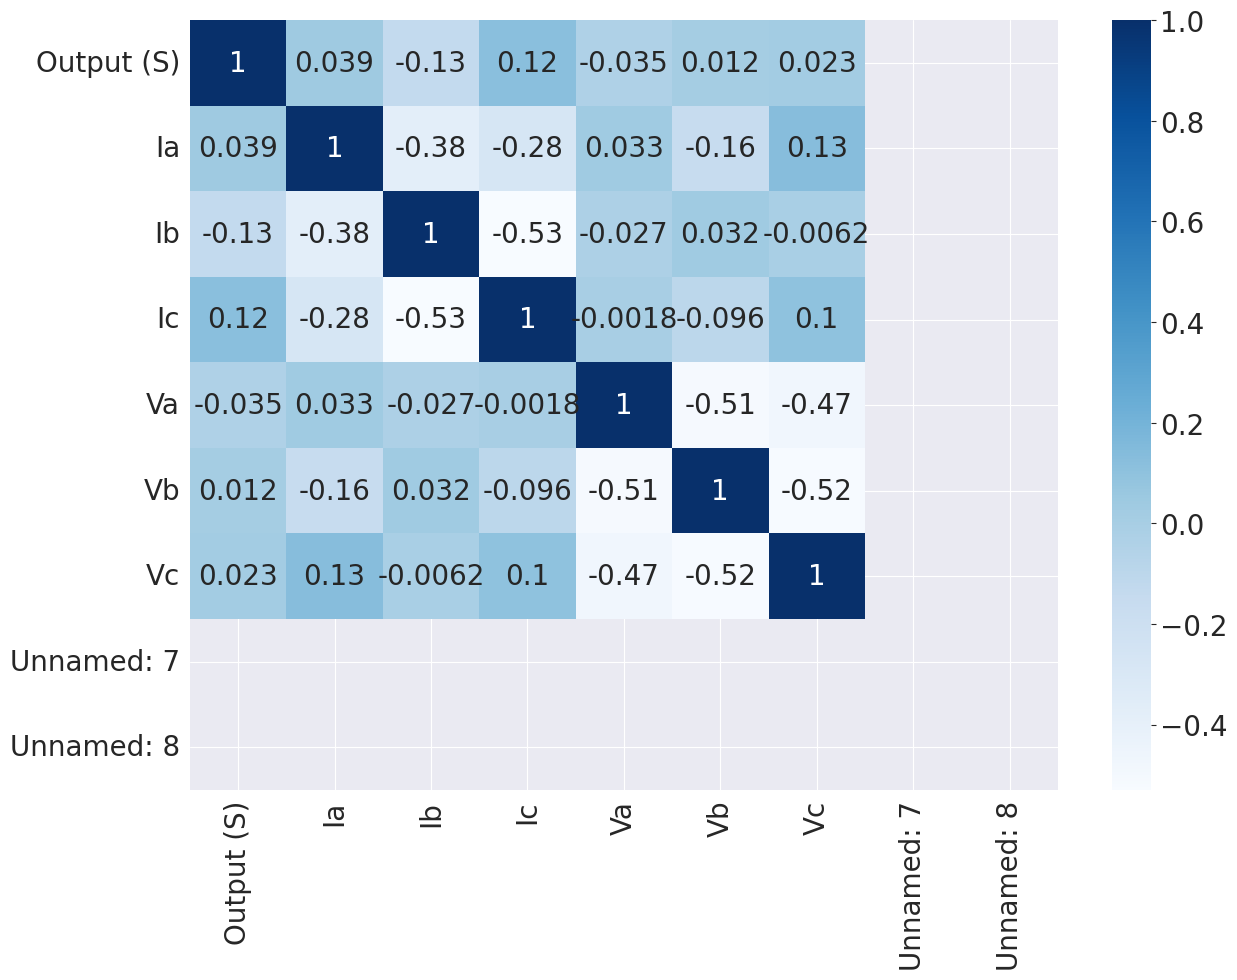

In [15]:
sns.heatmap(binary_data.corr(),annot=True,cmap='Blues')
plt.show()

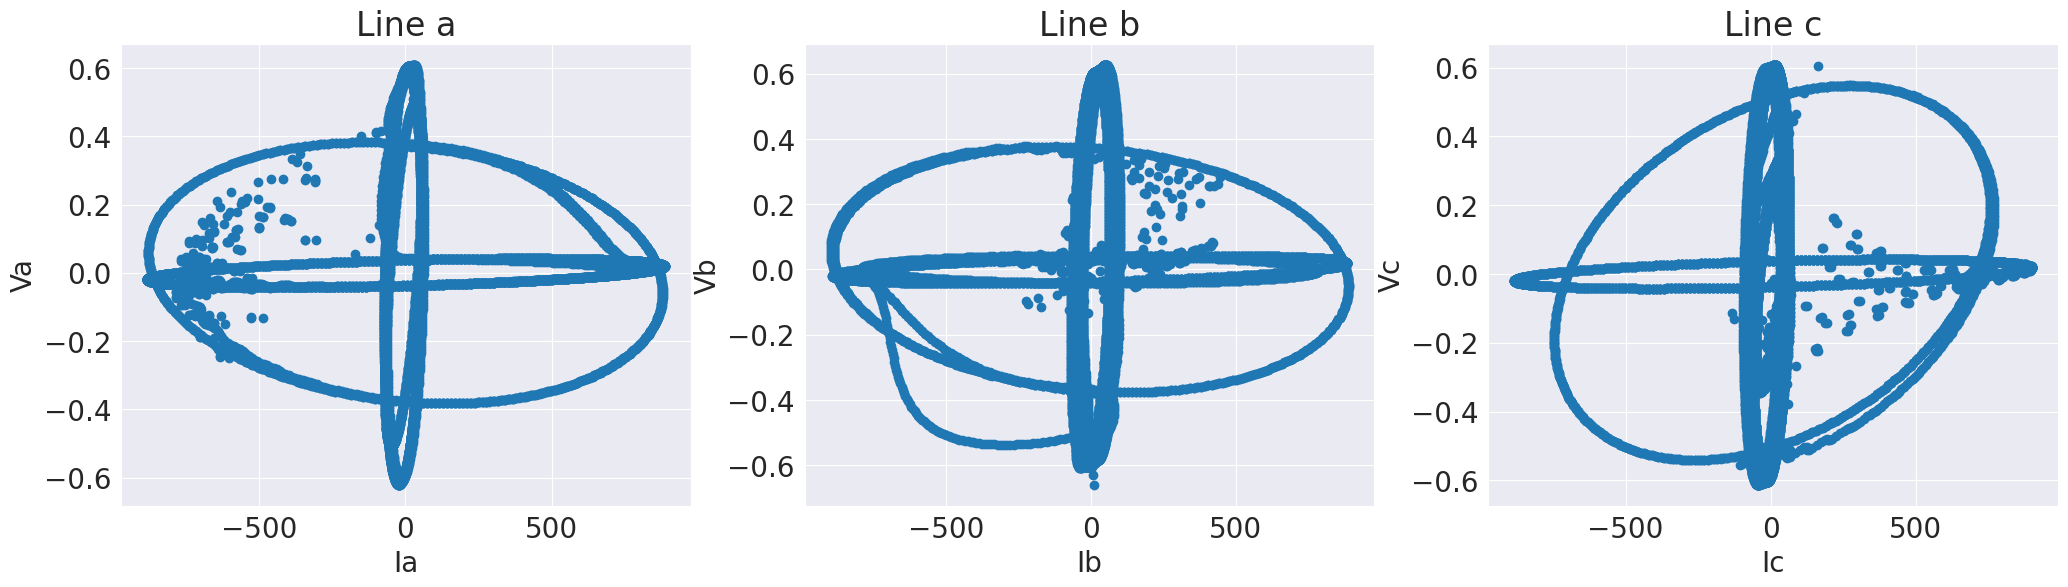

In [16]:
plt.figure(figsize=(25,6))

a1=plt.subplot2grid((1,3),(0,0))
a1.scatter(binary_data['Ia'],binary_data['Va'])
a1.set_title('Line a')
a1.set_xlabel('Ia')
a1.set_ylabel('Va')

a2=plt.subplot2grid((1,3),(0,1))
a2.scatter(binary_data['Ib'],binary_data['Vb'])
a2.set_title('Line b')
a2.set_xlabel('Ib')
a2.set_ylabel('Vb')

a2=plt.subplot2grid((1,3),(0,2))
a2.scatter(binary_data['Ic'],binary_data['Vc'])
a2.set_title('Line c')
a2.set_xlabel('Ic')
a2.set_ylabel('Vc')

plt.show()

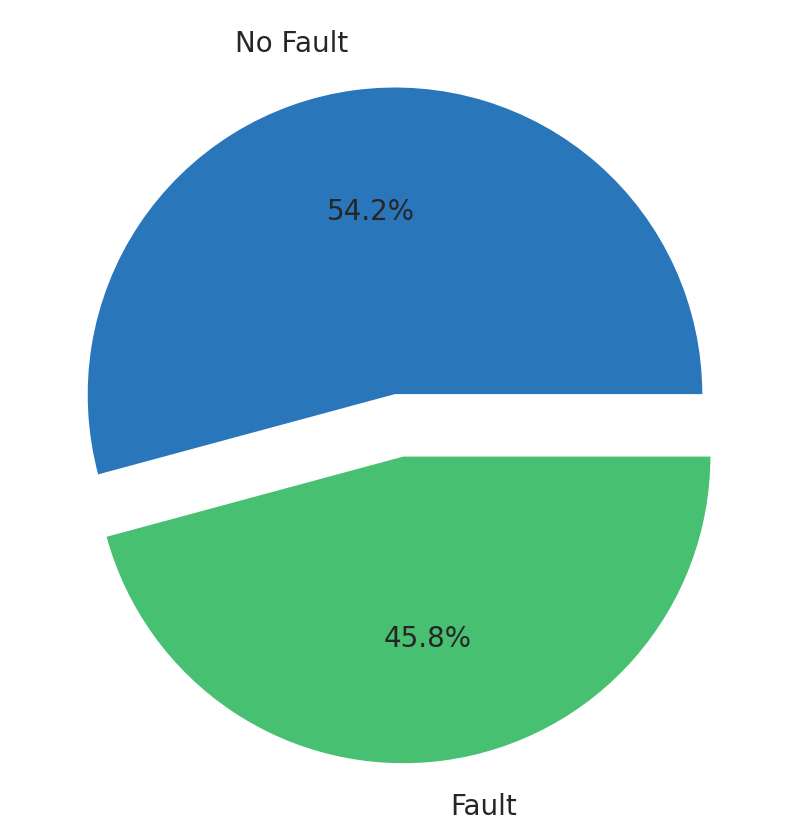

In [17]:
plt.pie(x=binary_data['Output (S)'].value_counts().sort_index(),
        labels=["No Fault",'Fault'],
        explode=[0,0.2],autopct='%1.1f%%',
        labeldistance=1.15,
        colors=['#2976bb','#48c072'])
plt.show()

In [19]:
def dist(cola,colb):

    fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(18,10))

    sns.distplot(binary_data[cola], label='Line Current', hist=True, color='#fc0328', ax=axs[0])
    sns.distplot(binary_data[colb], label='Line Voltage', hist=True, color='#0c06c7', ax=axs[1])

    axs[0].legend(loc='upper right', prop={'size': 12})
    axs[1].legend(loc='upper right', prop={'size': 12})

    plt.show()

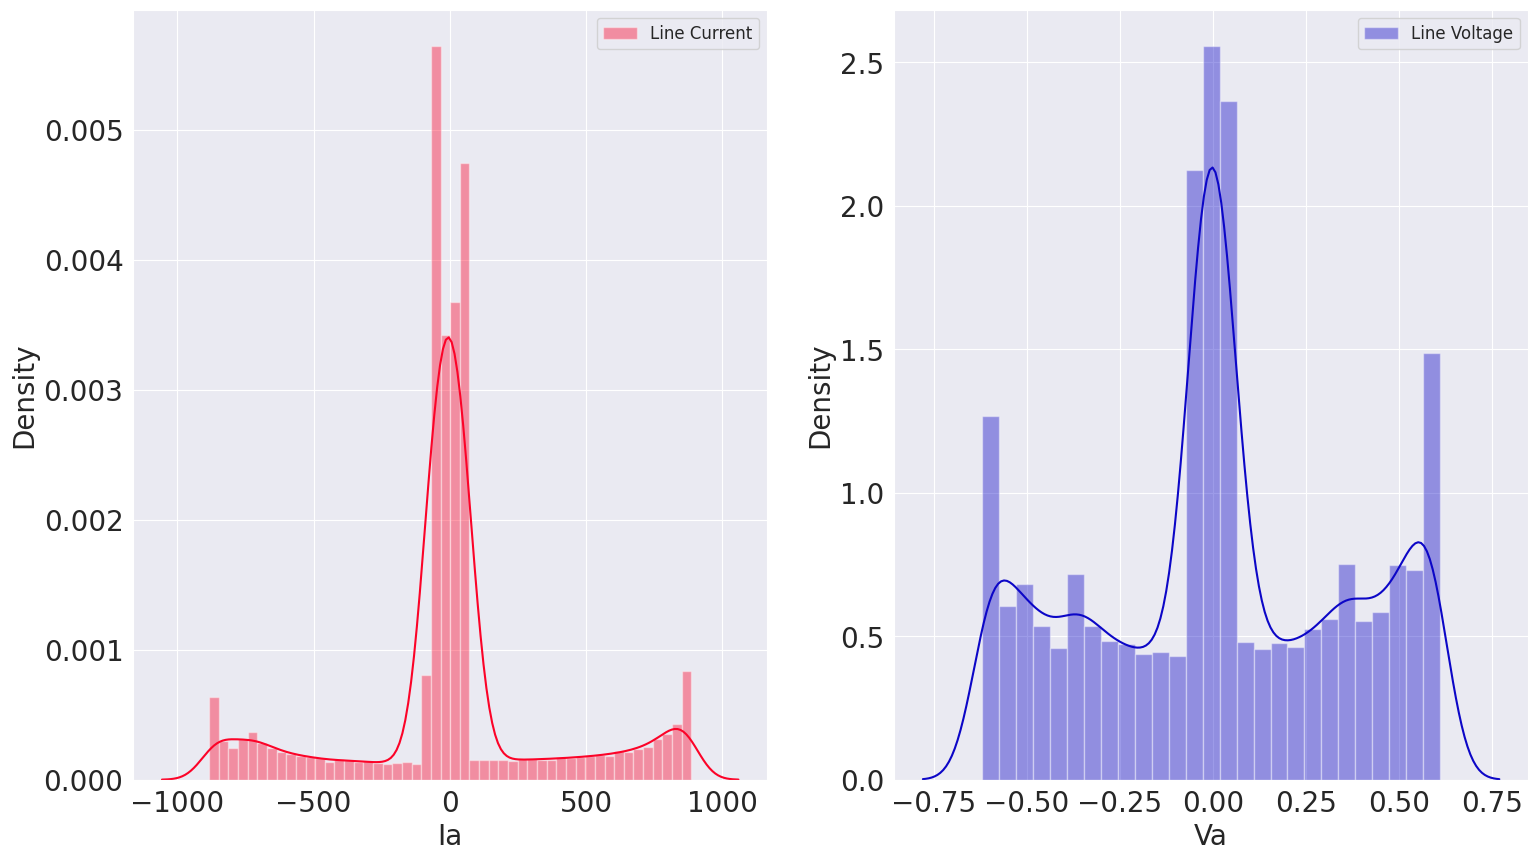

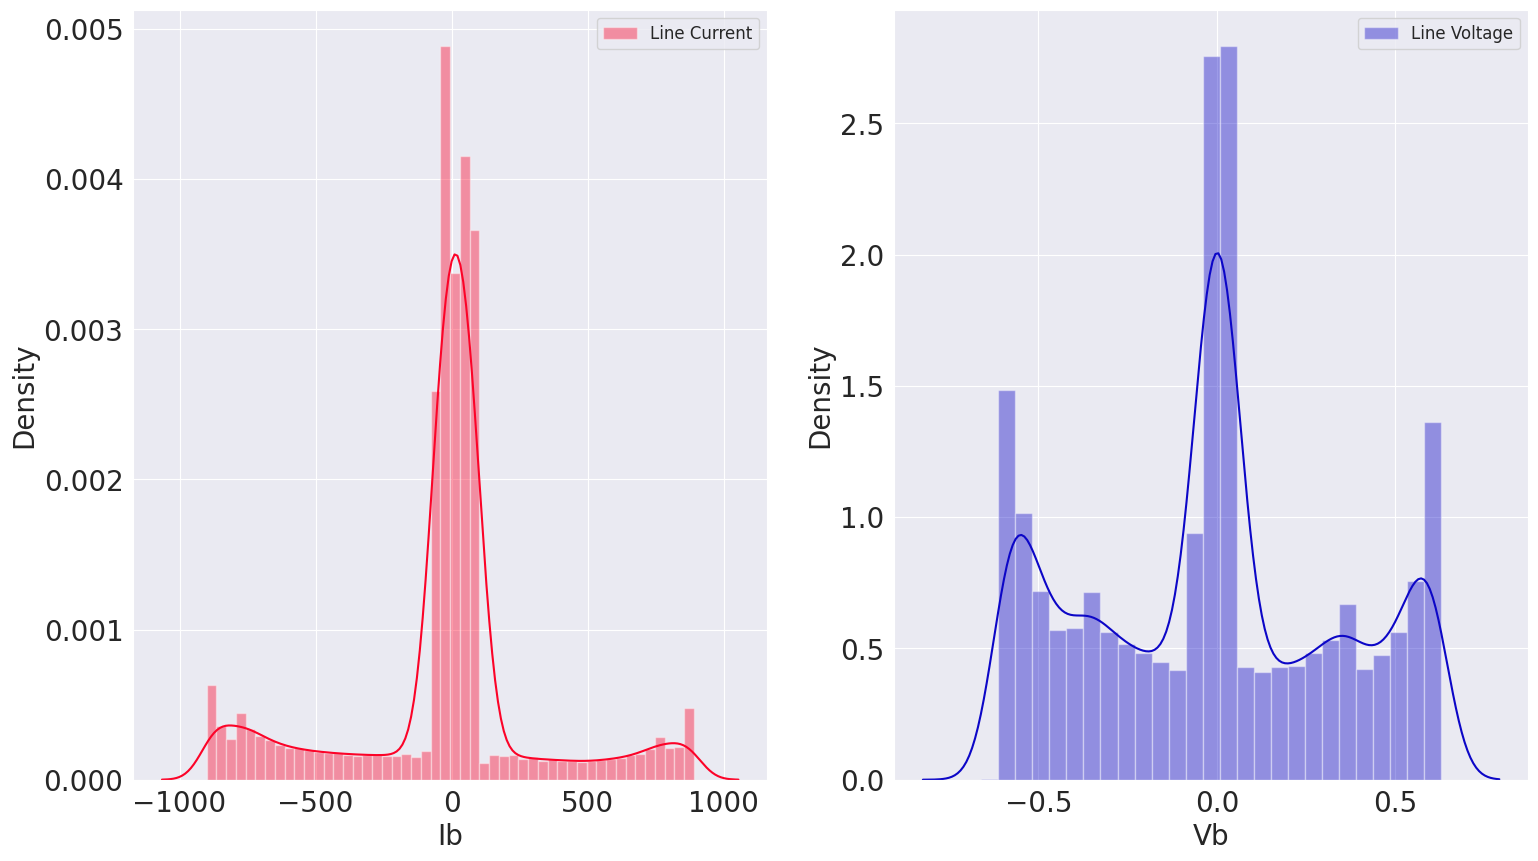

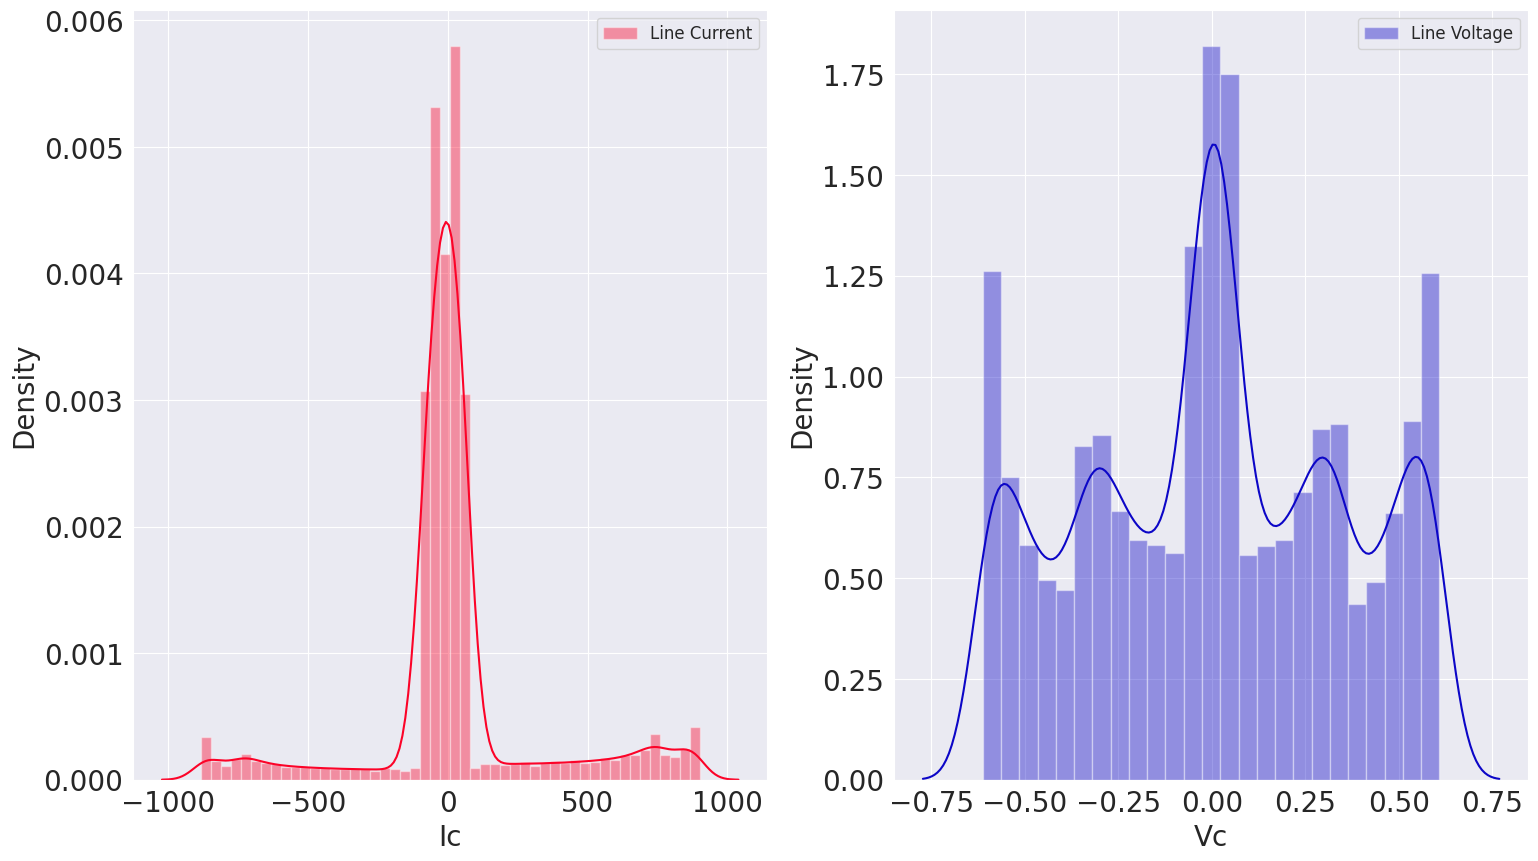

In [20]:
lines=[
    ('Ia','Va'),
    ('Ib','Vb'),
    ('Ic','Vc')
]

for cola,colb in lines:
  dist(cola,colb)
  print("\n")

# **Model Building- Binary Classifier**

In [6]:
y=binary_data.iloc[:,0]
x=binary_data.iloc[:,1:7]
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=1)
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((9600, 6), (2401, 6), (9600,), (2401,))

In [8]:
model_1=RandomForestClassifier()
model_1.fit(x_train,y_train)
y_pred=model_1.predict(x_test)

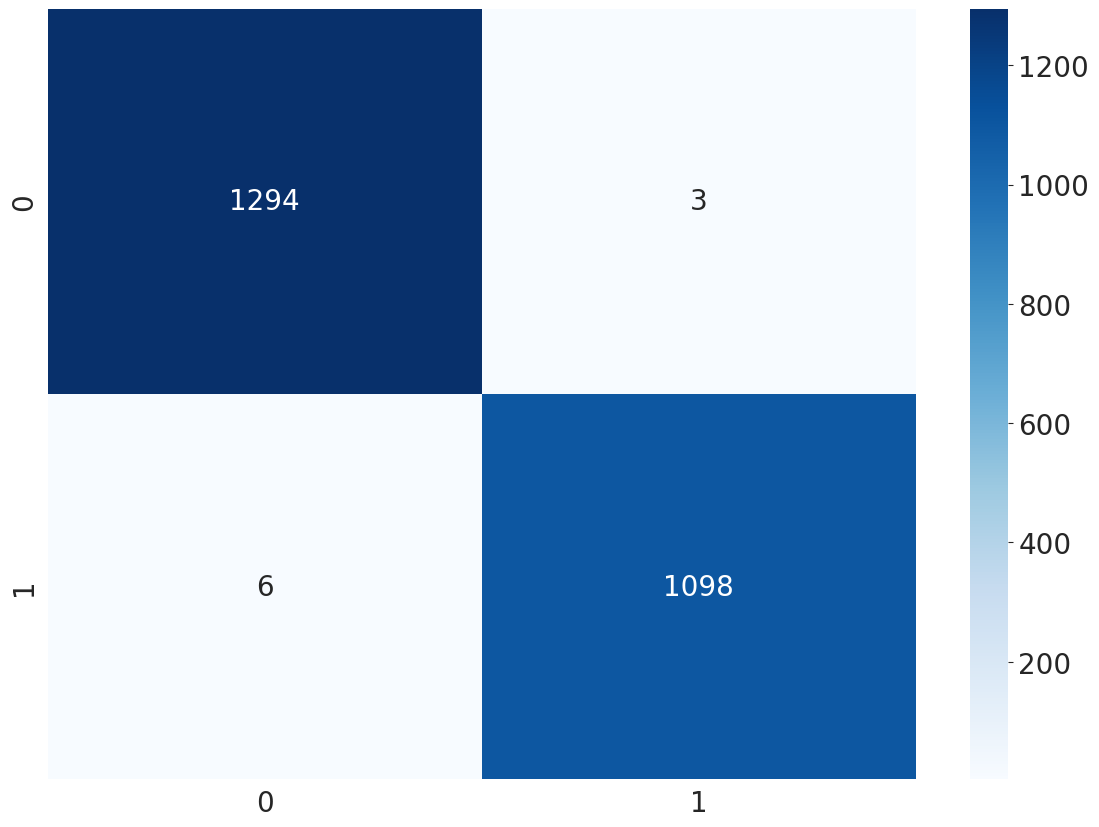

In [10]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Blues',fmt='.4g')
plt.show()

In [13]:
print(f"Accuracy score: {accuracy_score(y_test,y_pred)*100:.03f}")
print(f"Precision score: {precision_score(y_test,y_pred)*100:.03f}")
print(f"Recall score: {recall_score(y_test,y_pred)*100:.03f}")

Accuracy score: 99.625
Precision score: 99.728
Recall score: 99.457


In [14]:
print(f"Classification Report:\n{classification_report(y_test,y_pred)}")

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1297
           1       1.00      0.99      1.00      1104

    accuracy                           1.00      2401
   macro avg       1.00      1.00      1.00      2401
weighted avg       1.00      1.00      1.00      2401



# **Multiclass Classification**

In [15]:
print('Number of samples:',multi_data.shape[0],"\nNumber of Features:",multi_data.shape[1])

Number of samples: 7861 
Number of Features: 10


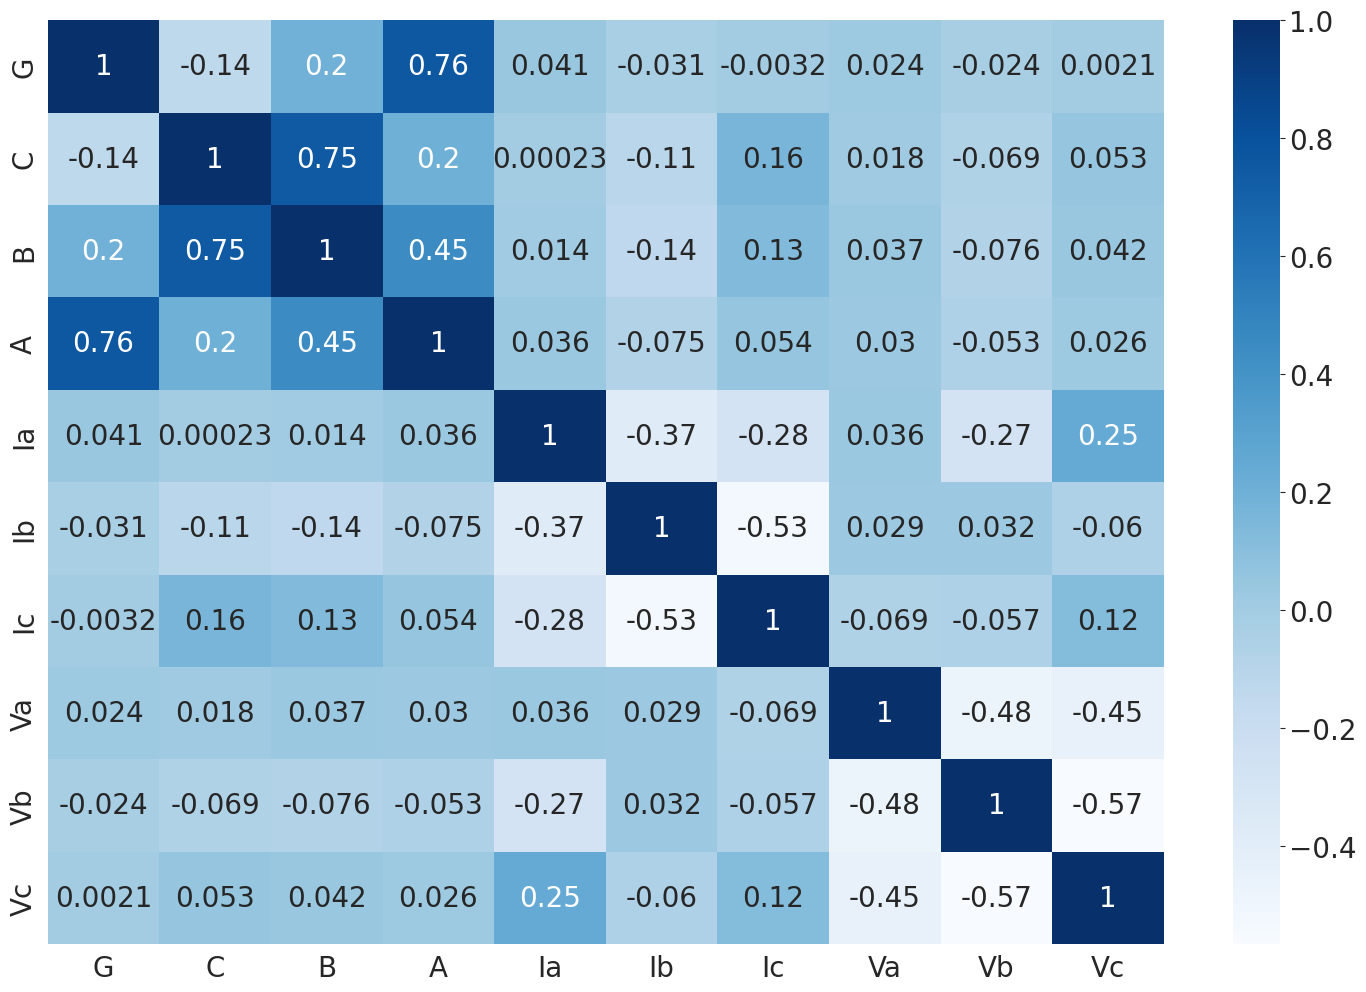

In [16]:
plt.figure(figsize=(18,12))
sns.heatmap(multi_data.corr(),annot=True,cmap='Blues')
plt.show()

Text(0, 0.5, 'Vc')

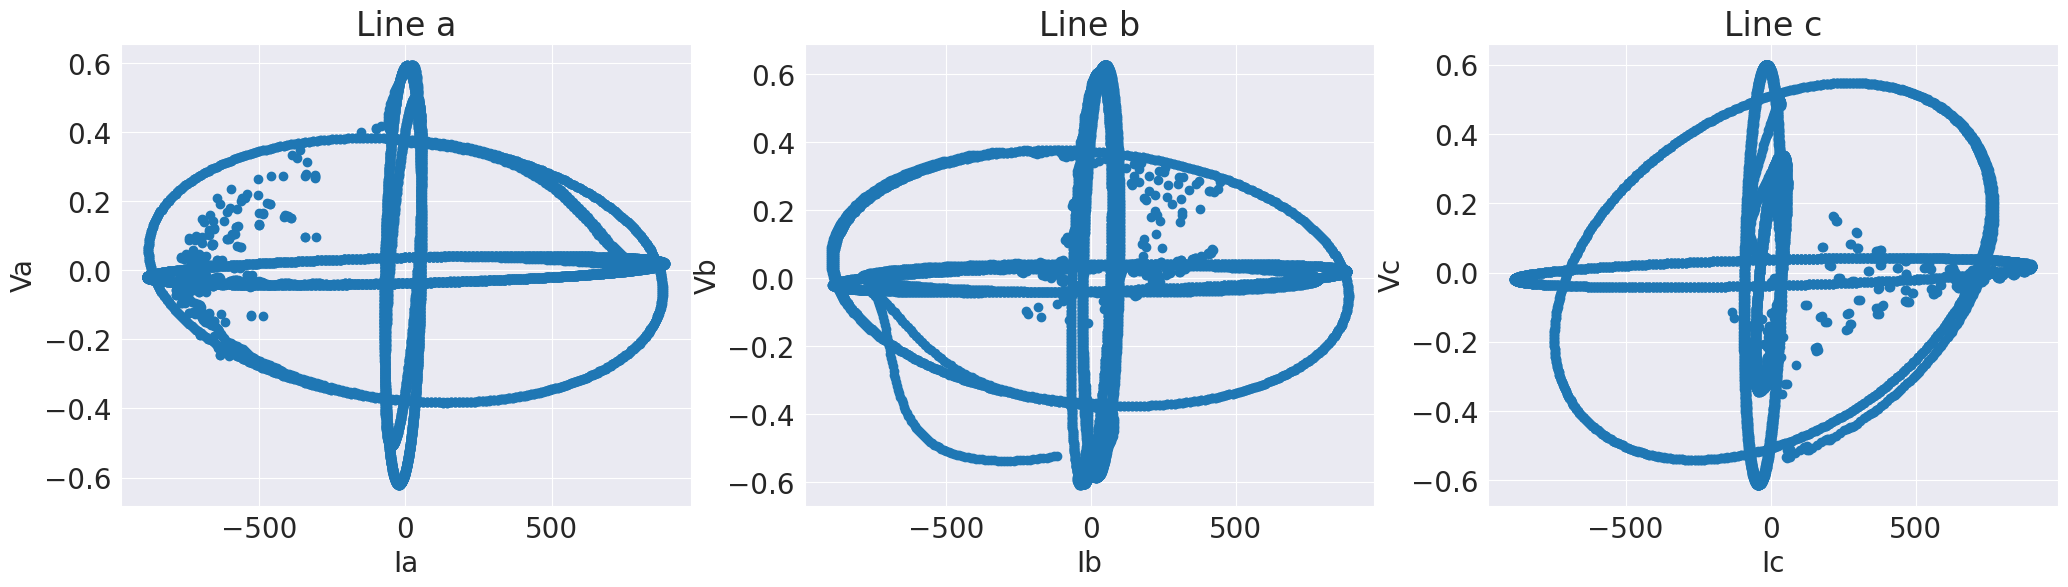

In [17]:
plt.figure(figsize=(25,6))

a1=plt.subplot2grid((1,3),(0,0))
a1.scatter(multi_data['Ia'],multi_data['Va'])
a1.set_title('Line a')
a1.set_xlabel('Ia')
a1.set_ylabel('Va')

a2=plt.subplot2grid((1,3),(0,1))
a2.scatter(multi_data['Ib'],multi_data['Vb'])
a2.set_title('Line b')
a2.set_xlabel('Ib')
a2.set_ylabel('Vb')

a2=plt.subplot2grid((1,3),(0,2))
a2.scatter(multi_data['Ic'],multi_data['Vc'])
a2.set_title('Line c')
a2.set_xlabel('Ic')
a2.set_ylabel('Vc')

In [19]:
def dist(cola,colb):

    fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(18,10))

    sns.distplot(multi_data[cola], label='Line Current', hist=True, color='#fc0328', ax=axs[0])
    sns.distplot(multi_data[colb], label='Line Voltage', hist=True, color='#0c06c7', ax=axs[1])

    axs[0].legend(loc='upper right', prop={'size': 12})
    axs[1].legend(loc='upper right', prop={'size': 12})

    plt.show()

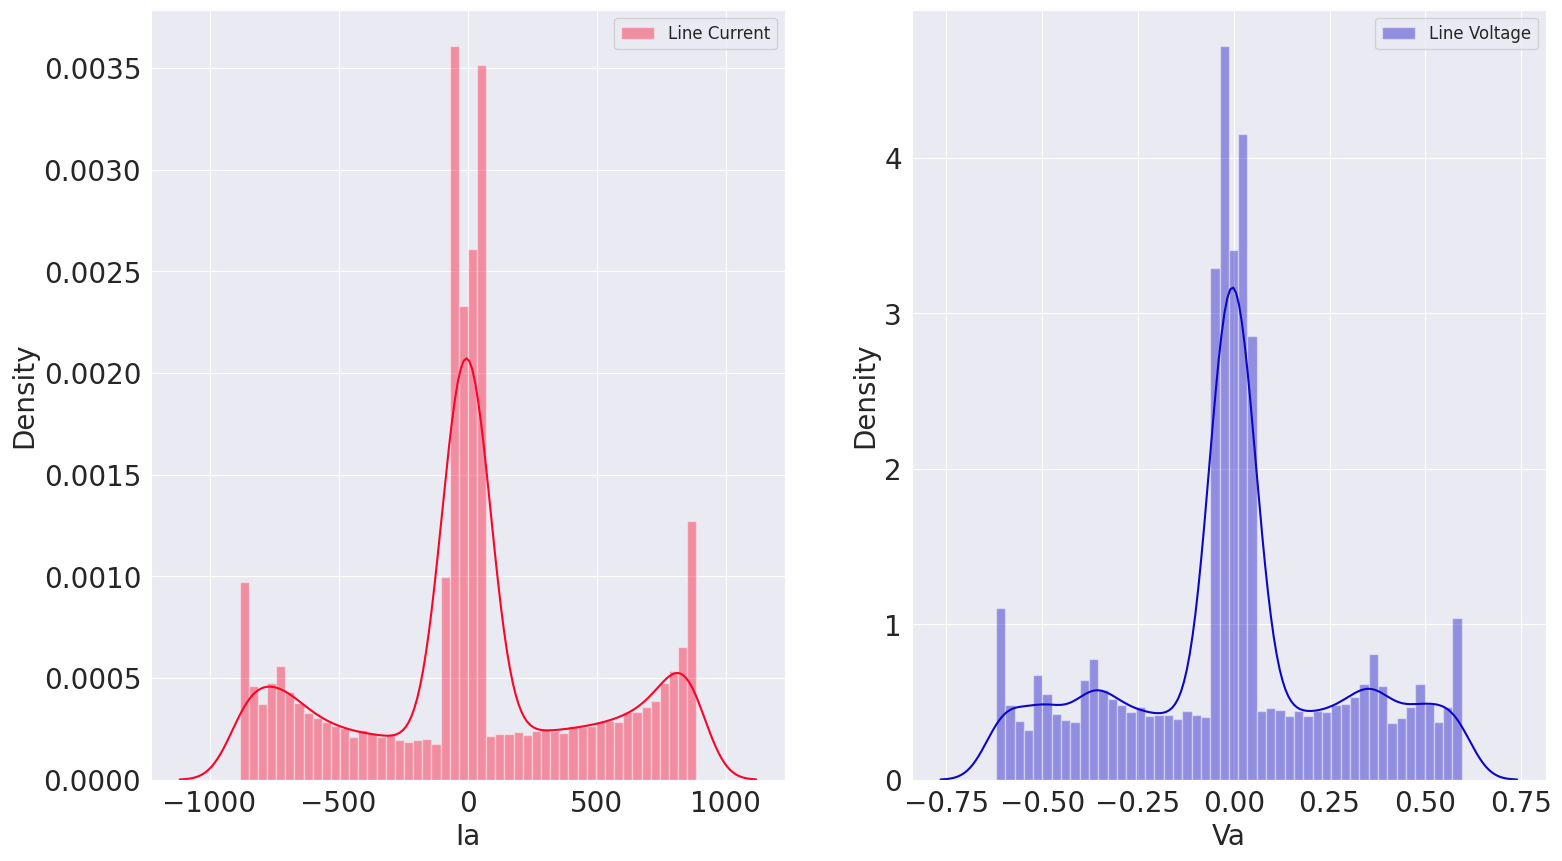

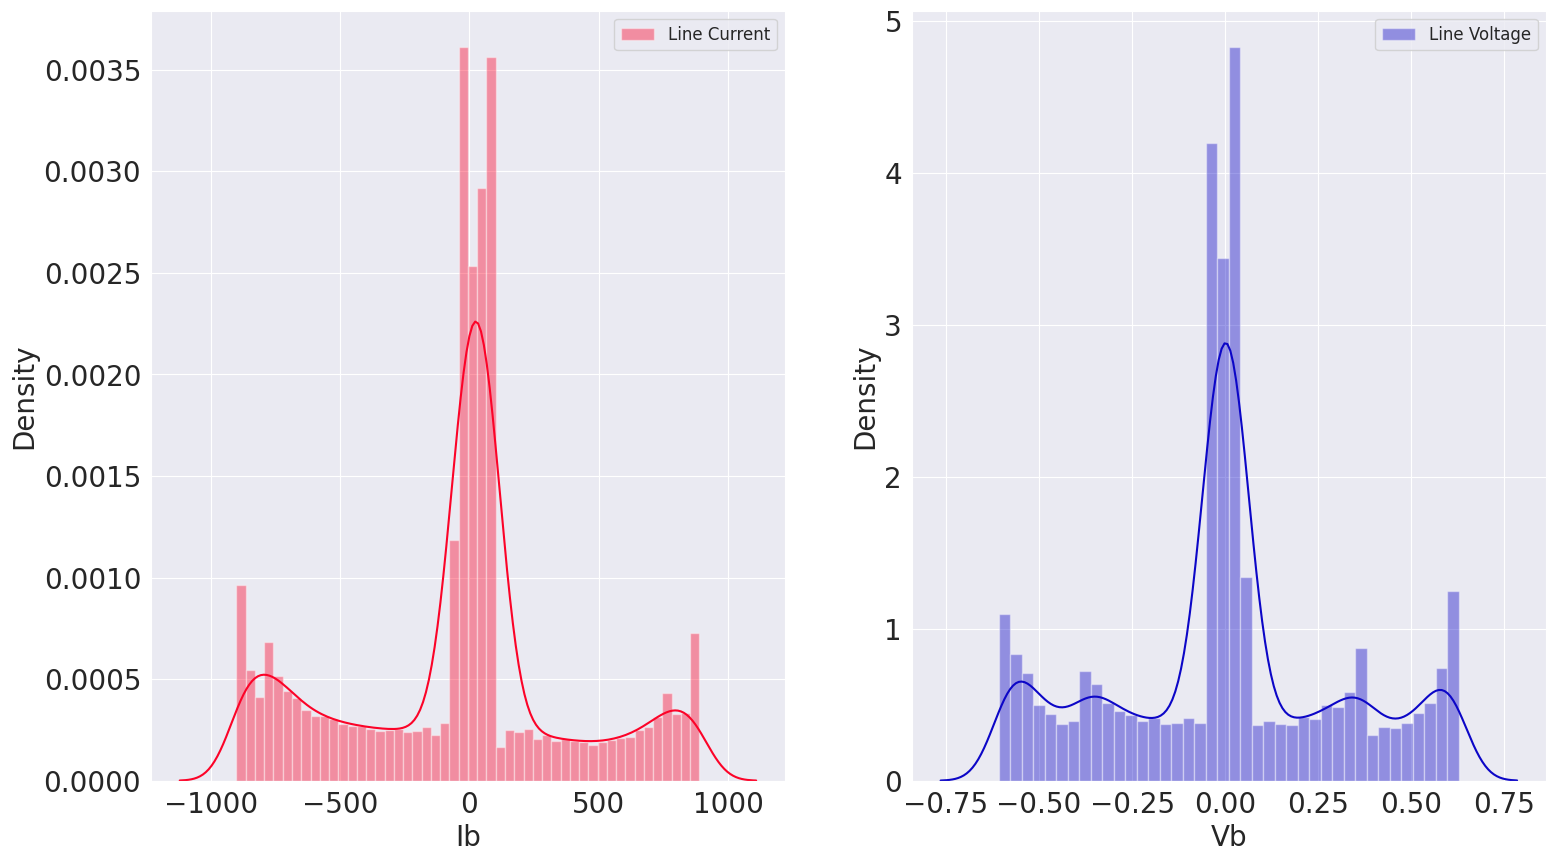

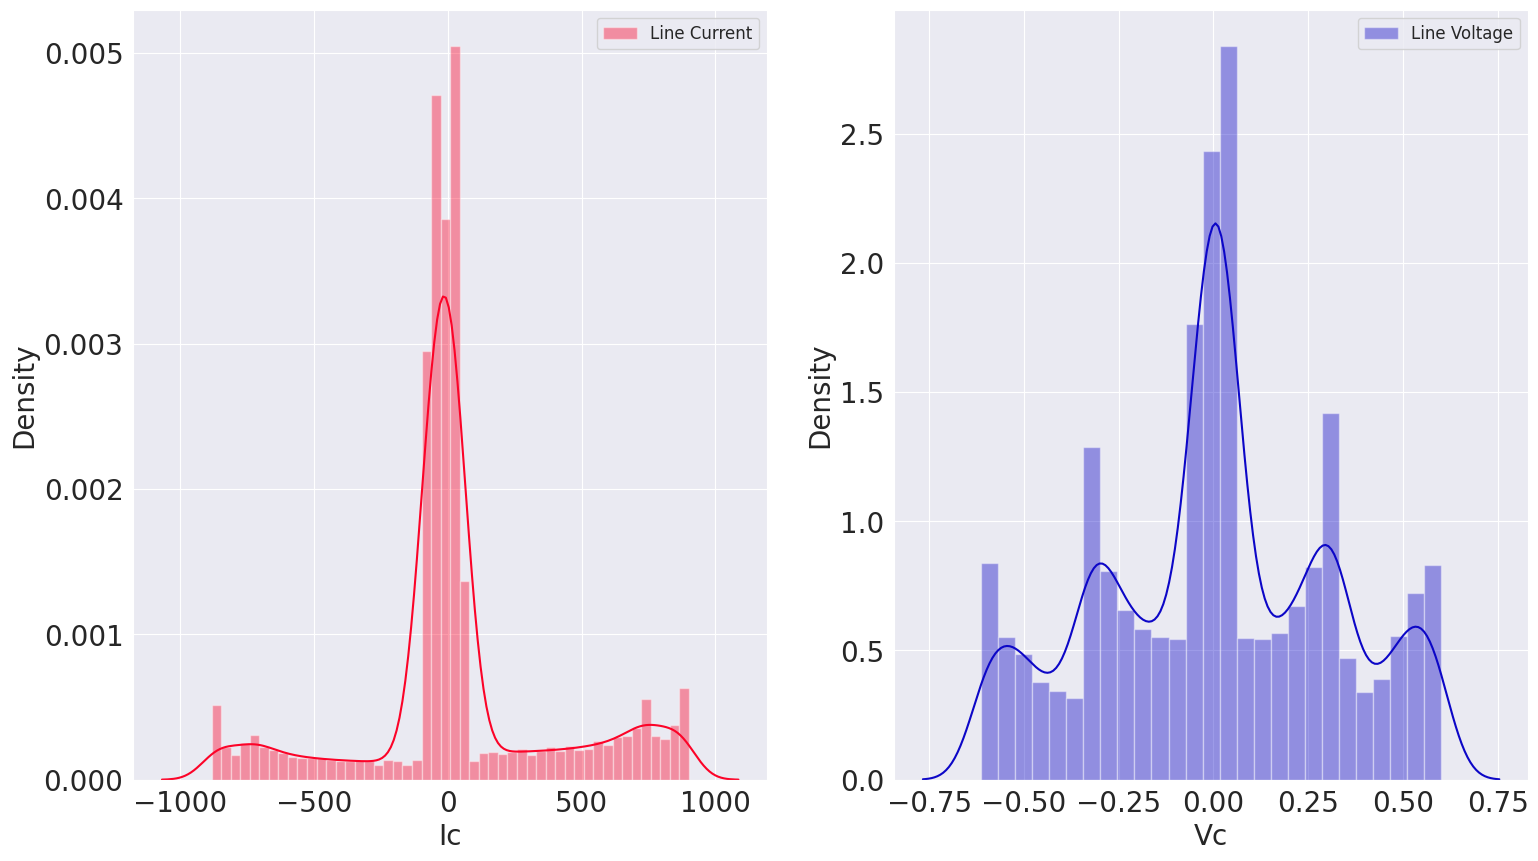

In [21]:
lines=[
    ('Ia','Va'),
    ('Ib','Vb'),
    ('Ic','Vc')
]

for cola,colb in lines:
  dist(cola,colb)
  print("\n")


# **Model Building- Multiclass Classifier**

In [25]:
multi_data['faultType'] = multi_data['G'].astype(str) + multi_data['C'].astype(str) + multi_data['B'].astype(str) + multi_data['A'].astype(str)
multi_data.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,faultType
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1001
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1001
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1001
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1001
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1001


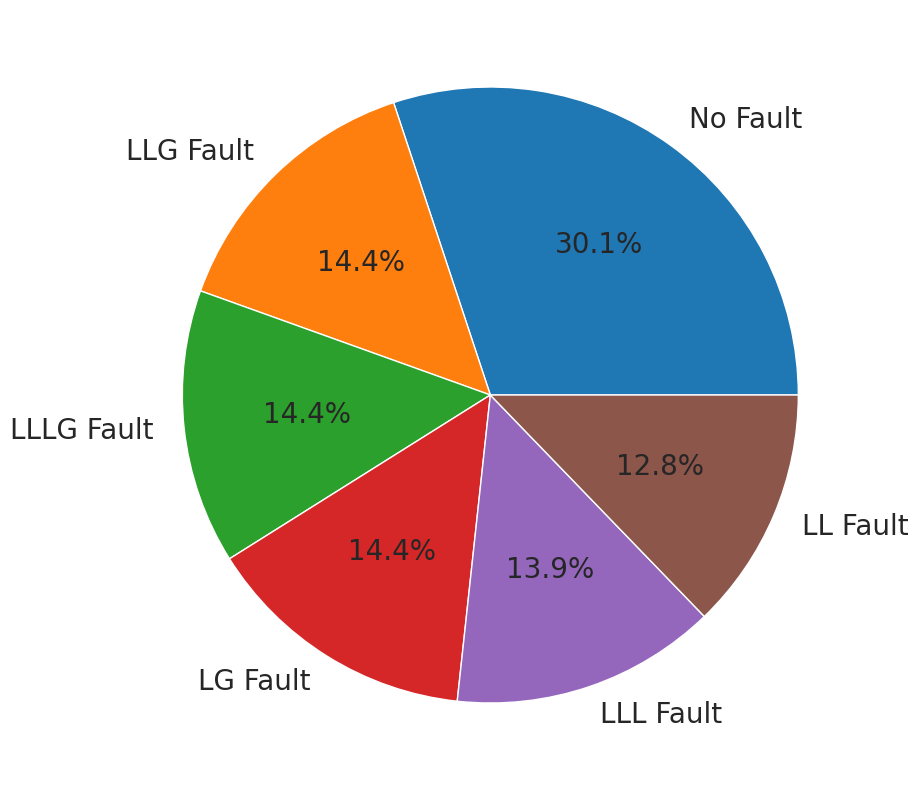

In [28]:
plt.pie(multi_data['faultType'].value_counts(),autopct='%1.1f%%',labels=["No Fault","LLG Fault","LLLG Fault","LG Fault","LLL Fault","LL Fault"])
plt.show()

In [30]:
x = multi_data.drop(['G','C','B','A','faultType'], axis=1)
y = multi_data['faultType']

In [31]:
le= LabelEncoder()
y=le.fit_transform(y)

In [32]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=1)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((6288, 6), (1573, 6), (6288,), (1573,))

In [33]:
model2=RandomForestClassifier()
model2.fit(x_train,y_train)
y_pred=model2.predict(x_test)

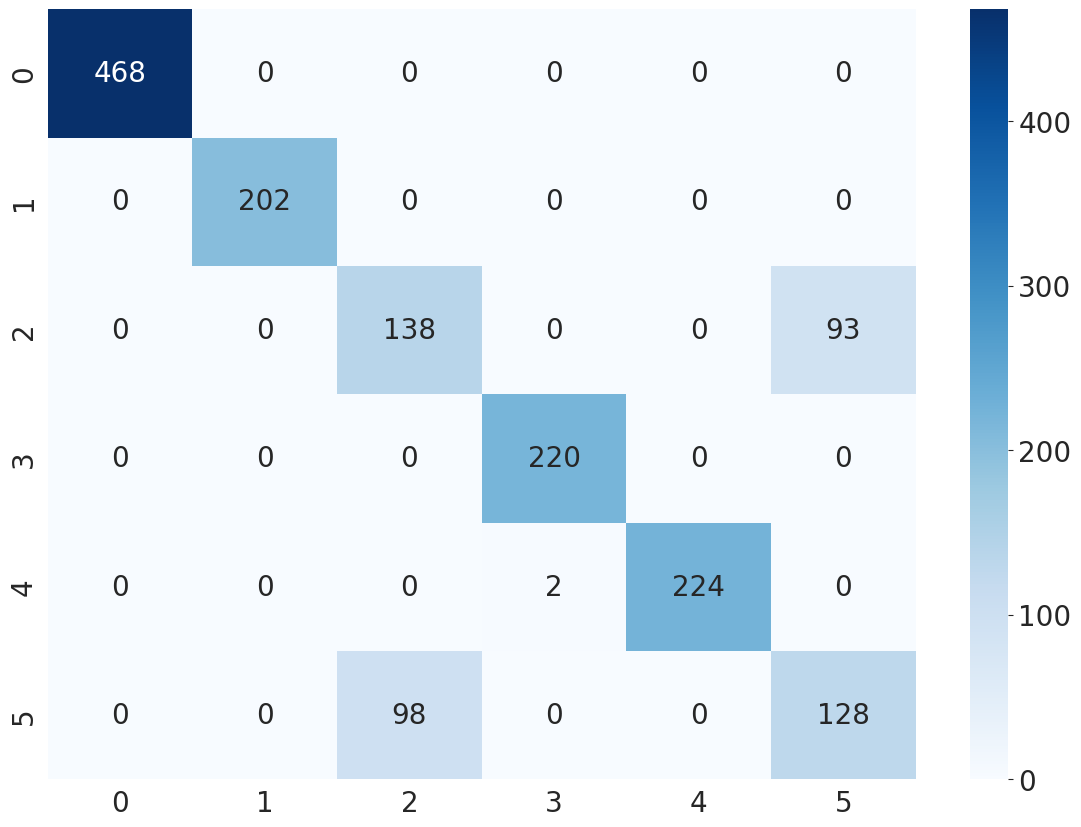

In [37]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Blues',fmt='.4g')
plt.show()

In [38]:
print(f'Accuracy score: {accuracy_score(y_test,y_pred)*100:.03f}')

Accuracy score: 87.730


In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       468
           1       1.00      1.00      1.00       202
           2       0.58      0.60      0.59       231
           3       0.99      1.00      1.00       220
           4       1.00      0.99      1.00       226
           5       0.58      0.57      0.57       226

    accuracy                           0.88      1573
   macro avg       0.86      0.86      0.86      1573
weighted avg       0.88      0.88      0.88      1573



# **Class-wise Error Analaysis**

In [41]:
cr= classification_report(y_test, y_pred, output_dict=True)
cr.keys()

dict_keys(['0', '1', '2', '3', '4', '5', 'accuracy', 'macro avg', 'weighted avg'])

In [42]:
f1_scores = {}
for key, val in cr.items():
    if key == 'accuracy':
        break
    class_name = le.inverse_transform([int(key)])[0]
    f1_scores[class_name] = val["f1-score"]
sorted(f1_scores.items(), key=lambda x: x[1], reverse=True)

[('0000', 1.0),
 ('0110', 1.0),
 ('1011', 0.9955555555555555),
 ('1001', 0.995475113122172),
 ('0111', 0.5910064239828694),
 ('1111', 0.5727069351230425)]

In [43]:
f1_scores_df = pd.DataFrame({'class': f1_scores.keys(),
                             'f1': f1_scores.values()})
f1_scores_df

,class,f1
0,0000,1.000000
1,0110,1.000000
2,0111,0.591006
3,1001,0.995475
4,1011,0.995556
5,1111,0.572707


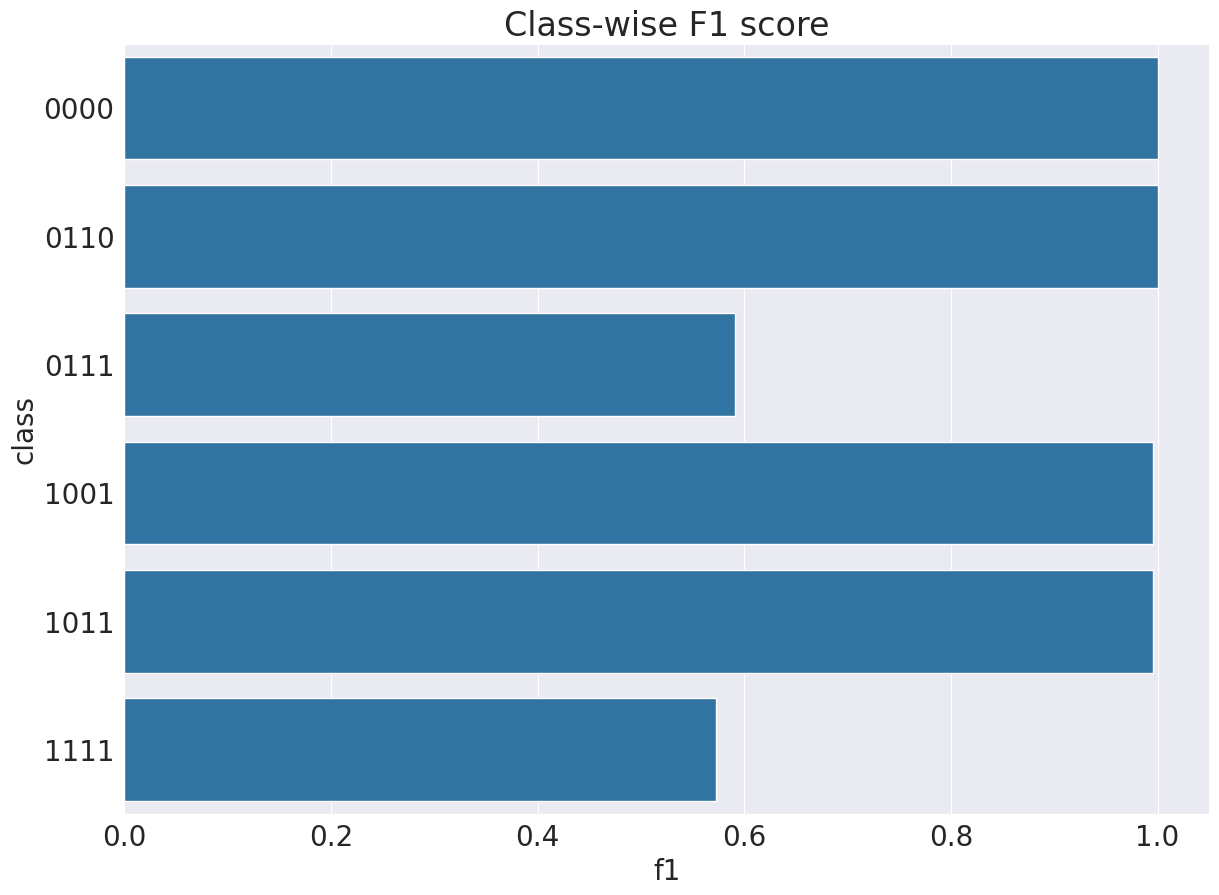

In [44]:
sns.barplot(data=f1_scores_df, x='f1', y='class')
plt.title("Class-wise F1 score")
plt.show()